In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind 
from cartopy import config
import cartopy
import cartopy.crs as ccrs
import cmocean
import cartopy.feature as cfeature

## Input files

In [2]:
ssta = xr.open_dataset('/g/data/e14/cp3790/Charuni/MHW-sev/tasman-ssta-extrap.nc')

In [29]:
ssta

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 110, time: 458)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-01 2015-06-02 ... 2016-08-31
  * lon      (lon) float64 135.2 135.8 136.2 136.8 ... 188.2 188.8 189.2 189.8
  * lat      (lat) float64 -52.75 -52.25 -51.75 -51.25 ... -29.25 -28.75 -28.25
Data variables:
    ssta     (time, lat, lon) float64 ...
    mask     (lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear

In [3]:
tasman1516 = ssta.ssta

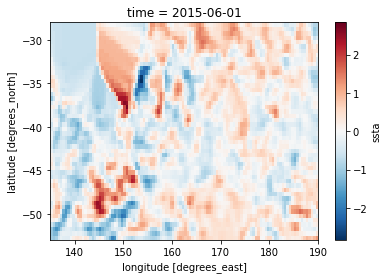

In [31]:
tasman1516.isel(time=0).plot()

In [4]:
tasman1516_mon = tasman1516.resample(time="M").mean()

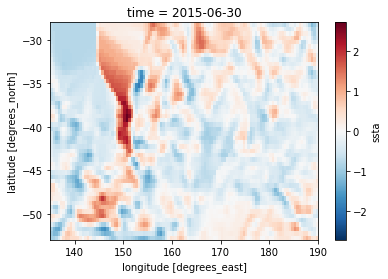

In [33]:
tasman1516_mon.isel(time=0).plot()

In [34]:
tasman1516_mon.to_netcdf('/g/data/e14/cp3790/Charuni/MHW-sev/tasman1516_mon.nc')

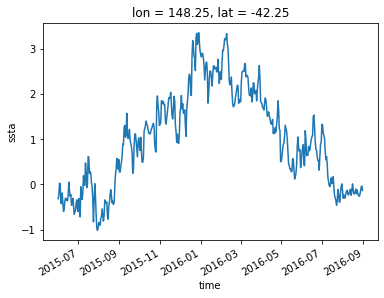

In [35]:
tasman1516.sel(lat=-42.47, lon=148.27, method='nearest').plot()

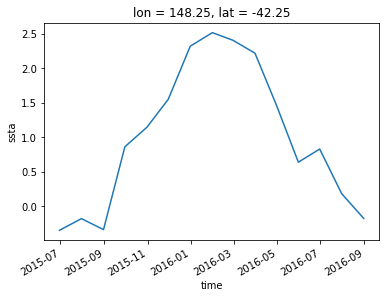

In [36]:
tasman1516.sel(lat=-42.47, lon=148.27, method='nearest').resample(time='M').mean().plot()

In [4]:
sst_clim = xr.open_dataset('/g/data/e14/cp3790/Charuni/MHW-sev/sst-clim.nc')

In [5]:
sst_clim

<xarray.Dataset>
Dimensions:   (lat: 100, lon: 220, month: 12)
Coordinates:
  * lat       (lat) float64 -52.88 -52.62 -52.38 -52.12 ... -28.62 -28.38 -28.12
  * lon       (lon) float64 135.1 135.4 135.6 135.9 ... 189.1 189.4 189.6 189.9
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst-clim  (month, lat, lon) float32 ...

In [9]:
sst_clim = sst_clim['sst-clim']

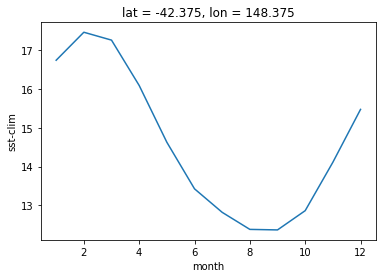

In [11]:
sst_clim.sel(lat=-42.47, lon=148.27, method='nearest').plot()

## 15/16 Tasman Sea MHW panel

In [5]:
ds = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/MHW-sev/mhw_severity.pc90.*.nc')
ds

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:144: SerializationWarning: Ambiguous reference date string: 01-01-01 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-01-01 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:        (time: 13726, lat: 320, lon: 480, time366: 366)
Coordinates:
  * lat            (lat) float64 -69.88 -69.62 -69.38 ... 9.375 9.625 9.875
  * lon            (lon) float64 90.12 90.38 90.62 90.88 ... 209.4 209.6 209.9
  * time           (time) datetime64[ns] 1981-08-30 1981-08-31 ... 2019-03-29
  * time366        (time366) datetime64[ns] 1983-12-30 1983-12-31 ... 1984-12-29
Data variables:
    severity       (time, lat, lon) float32 dask.array<chunksize=(13726, 80, 120), meta=np.ndarray>
    ssta           (time, lat, lon) float32 dask.array<chunksize=(13726, 80, 120), meta=np.ndarray>
    climatology90  (time366, lat, lon) float32 dask.array<chunksize=(366, 80, 120), meta=np.ndarray>
    climatology    (time366, lat, lon) float32 dask.array<chunksize=(366, 80, 120), meta=np.ndarray>
Attributes:
    history:  Created in regional_MHW_hdd4_anomaly.py pctile=902019-04-02 11:...

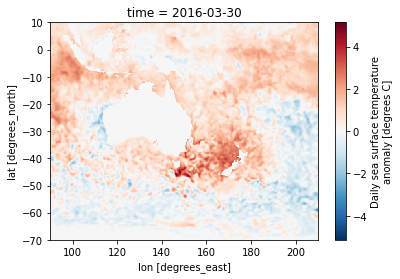

In [8]:
ds.ssta.isel(time=12631).plot()

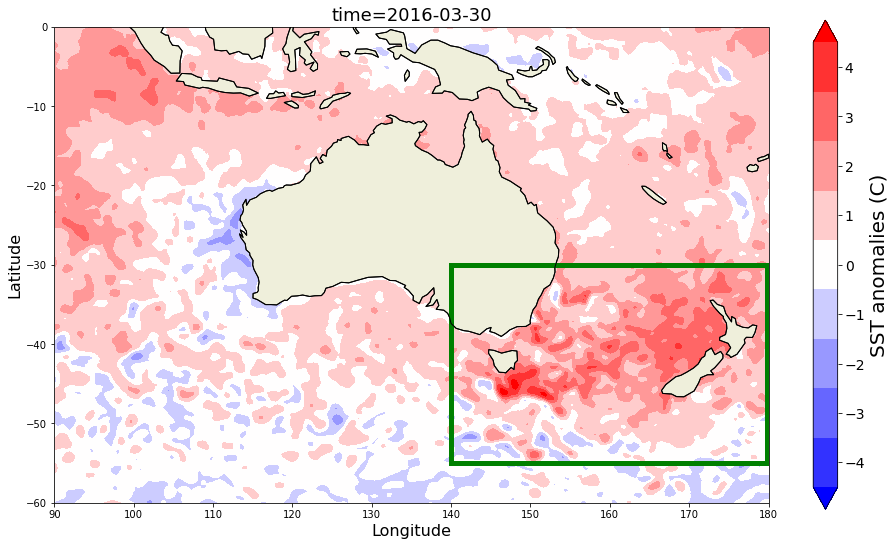

In [12]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([90, 180, -60, -0],crs=ccrs.PlateCarree())     
ax.set_xticks([90, 100, 110, 120, 130, 140, 150, 160, 170, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-60, -50, -40, -30, -20, -10, 0], crs=ccrs.PlateCarree())

ploteo=ds.ssta.isel(time=12631).plot.contourf(
                levels=np.arange(-4.5, 5, 1),
                cmap=plt.cm.get_cmap('bwr'),
                extend='both'
)

ploteo.colorbar.set_ticks(np.arange(-4,5,1))

ploteo.colorbar.ax.set_ylabel('SST anomalies (C)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor=cfeature.COLORS['land'])
# Left most point, length, height, face colour, edge colour and line width
ax.add_patch(Rectangle((140, -55),
                        39.75, 25,
                        fc ='none', 
                        ec ='g',
                        lw = 5) )

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('time=2016-03-30', fontsize=18)

#plt.show()
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/tasman-mhw-intro.png')

## Control run outputs

In [89]:
ds = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-run/um_pvera_*.nc')

In [90]:
ds

<xarray.Dataset>
Dimensions:                          (time: 395, bnds: 2, longitude: 110, latitude: 50, longitude_0: 110, latitude_0: 51)
Coordinates:
  * time                             (time) datetime64[ns] 1981-06-01T12:00:0...
  * longitude                        (longitude) float32 135.2 135.8 ... 189.8
  * latitude                         (latitude) float32 -52.75 -52.25 ... -28.25
  * longitude_0                      (longitude_0) float32 135.0 135.5 ... 189.5
  * latitude_0                       (latitude_0) float32 -53.0 -52.5 ... -28.0
    height                           float64 10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    latitude_longitude               (time) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    rss_corr                         (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    rls                              (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts                               (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts_0                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts_1                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    surface_upward_latent_heat_flux  (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    hfss                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    uas                              (time, latitude_0, longitude_0) float32 dask.array<chunksize=(30, 51, 110), meta=np.ndarray>
    vas                              (time, latitude_0, longitude_0) float32 dask.array<chunksize=(30, 51, 110), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Aug 24 16:06:02 2021: cdo mergetime umnsaa_pvera1981060...
    source:       Data from Met Office Unified Model
    um_version:   11.7
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [91]:
ts_control = ds.ts

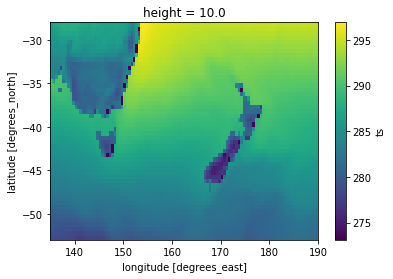

In [92]:
ts_control.mean(dim='time').plot()

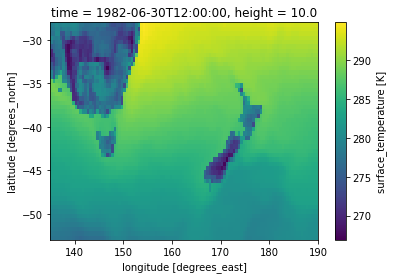

In [101]:
ts_control.isel(time=394).plot()

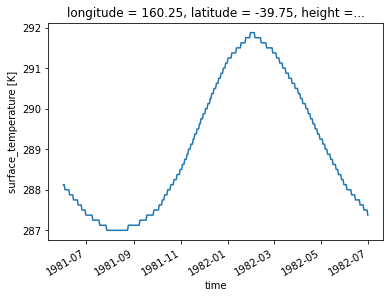

In [6]:
ts_control.sel(latitude=-40, longitude=160, method='nearest').plot()

## Alternate run outputs

In [4]:
ds = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/result-1982/um_*.nc')

In [17]:
ds

<xarray.Dataset>
Dimensions:                          (bnds: 2, latitude: 50, latitude_0: 51, longitude: 110, longitude_0: 110, time: 457)
Coordinates:
  * time                             (time) datetime64[ns] 1982-06-01T12:00:0...
  * longitude                        (longitude) float32 135.2 135.8 ... 189.8
  * latitude                         (latitude) float32 -52.75 -52.25 ... -28.25
  * longitude_0                      (longitude_0) float32 135.0 135.5 ... 189.5
  * latitude_0                       (latitude_0) float32 -53.0 -52.5 ... -28.0
    height                           float64 10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    latitude_longitude               (time) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    rss_corr                         (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    rls                              (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts                               (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts_0                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts_1                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    surface_upward_latent_heat_flux  (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    hfss                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    uas                              (time, latitude_0, longitude_0) float32 dask.array<chunksize=(30, 51, 110), meta=np.ndarray>
    vas                              (time, latitude_0, longitude_0) float32 dask.array<chunksize=(30, 51, 110), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Sep 16 15:13:55 2021: cdo mergetime /g/data/e14/cp3790/...
    source:       Data from Met Office Unified Model
    um_version:   11.7
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [5]:
mean_temp = ds.ts_1

In [19]:
mean_temp

<xarray.DataArray 'ts_1' (time: 457, latitude: 50, longitude: 110)>
dask.array<concatenate, shape=(457, 50, 110), dtype=float32, chunksize=(31, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1982-06-01T12:00:00 ... 1983-08-31T12:00:00
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 10.0
Attributes:
    standard_name:      surface_temperature
    units:              K
    grid_mapping:       latitude_longitude
    um_stash_source:    m01s00i024
    stash_description:  SURFACE TEMPERATURE AFTER TIMESTEP
    stash_help:         Temperature of the land or sea/sea-ice surface after ...
    cell_methods:       time: maximum (interval: 1 hour)

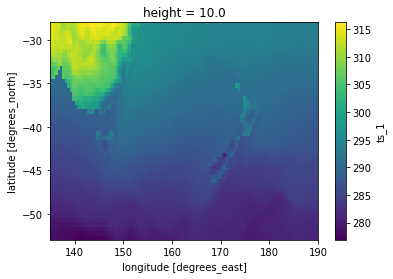

In [6]:
mean_temp.mean(dim='time').plot()

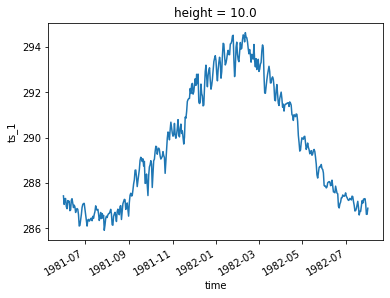

In [7]:
mean_temp.mean(dim=('latitude', 'longitude')).plot()

In [6]:
lat = -40
lon = 155

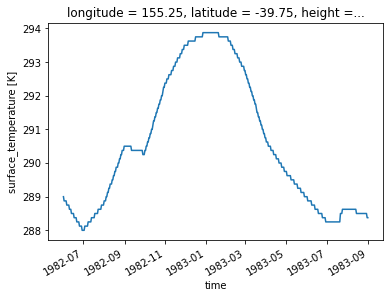

In [20]:
mean_temp.sel(latitude=lat, longitude=lon, method='nearest').plot()

In [7]:
ds_con = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/result_198106_200005/um_pvera_198106-2000-05.nc').sel(time=slice('1982-06', '1983-08'))

In [8]:
mean_temp_con = ds_con.ts_1

In [34]:
mean_temp_con

<xarray.DataArray 'ts_1' (time: 457, latitude: 50, longitude: 110)>
[2513500 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1982-06-01T12:00:00 ... 1983-08-31T12:00:00
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 ...
Attributes:
    standard_name:      surface_temperature
    units:              K
    grid_mapping:       latitude_longitude
    um_stash_source:    m01s00i024
    stash_description:  SURFACE TEMPERATURE AFTER TIMESTEP
    stash_help:         Temperature of the land or sea/sea-ice surface after ...
    cell_methods:       time: maximum (interval: 1 hour)

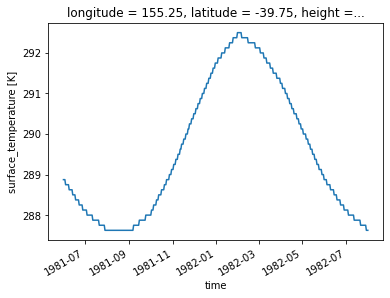

In [13]:
mean_temp_con.sel(latitude=lat, longitude=lon, method='nearest').plot()

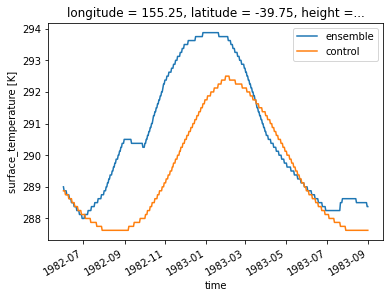

In [9]:
mean_temp.sel(latitude=lat, longitude=lon, method='nearest').plot(label='ensemble')
mean_temp_con.sel(latitude=lat, longitude=lon, method='nearest').plot(label='control')
plt.legend()

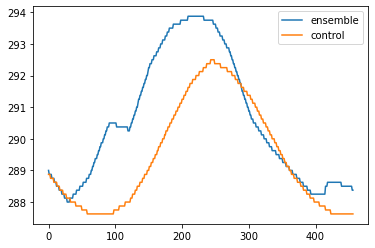

In [10]:
plt.plot(mean_temp.sel(latitude=lat, longitude=lon, method='nearest'), label='ensemble')
plt.plot(mean_temp_con.sel(latitude=lat, longitude=lon, method='nearest'), label='control')
plt.legend()

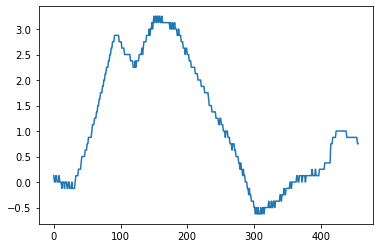

In [11]:
plt.plot((mean_temp.sel(latitude=lat, longitude=lon, method='nearest'))-(mean_temp_con.sel(latitude=lat, longitude=lon, method='nearest')))

In [31]:
ds_clim = xr.open_dataset('/g/data/e14/cp3790/Charuni/MHW-sev/sst-clim.nc') #monthly 
ds_clim

<xarray.Dataset>
Dimensions:   (lat: 100, lon: 220, month: 12)
Coordinates:
  * lat       (lat) float64 -52.88 -52.62 -52.38 -52.12 ... -28.62 -28.38 -28.12
  * lon       (lon) float64 135.1 135.4 135.6 135.9 ... 189.1 189.4 189.6 189.9
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst-clim  (month, lat, lon) float32 ...

In [55]:
ds_clim = xr.open_dataset('/g/data/e14/cp3790/Charuni/MHW-sev/ssta.nc') #daily
ds_clim

<xarray.Dataset>
Dimensions:  (lat: 100, lon: 220, time: 458)
Coordinates:
  * lat      (lat) float64 -52.88 -52.62 -52.38 -52.12 ... -28.62 -28.38 -28.12
  * lon      (lon) float64 135.1 135.4 135.6 135.9 ... 189.1 189.4 189.6 189.9
  * time     (time) datetime64[ns] 2015-06-01 2015-06-02 ... 2016-08-31
Data variables:
    ssta     (time, lat, lon) float32 ...

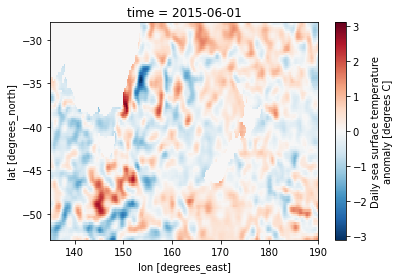

In [38]:
ds_clim['ssta'].isel(time=0).plot()

In [57]:
ds_clim = xr.open_dataset('/g/data/e14/cp3790/Charuni/MHW-sev/tasman-clim-extrap.nc') #monthly 
ds_clim

<xarray.Dataset>
Dimensions:   (lat: 50, lon: 110, month: 12)
Coordinates:
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    time      datetime64[ns] ...
  * lon       (lon) float64 135.2 135.8 136.2 136.8 ... 188.2 188.8 189.2 189.8
  * lat       (lat) float64 -52.75 -52.25 -51.75 -51.25 ... -29.25 -28.75 -28.25
Data variables:
    sst-clim  (month, lat, lon) float64 ...
    mask      (lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear

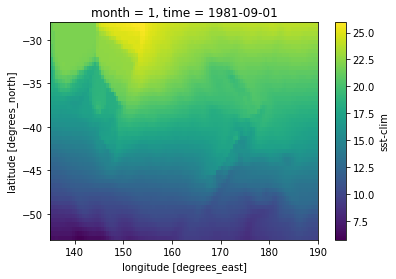

In [36]:
ds_clim['sst-clim'].isel(month=0).plot()

In [56]:
ds_clim = xr.open_dataset('/g/data/e14/cp3790/Charuni/MHW-sev/tasman-ssta-extrap.nc') #daily
ds_clim

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 110, time: 458)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-01 2015-06-02 ... 2016-08-31
  * lon      (lon) float64 135.2 135.8 136.2 136.8 ... 188.2 188.8 189.2 189.8
  * lat      (lat) float64 -52.75 -52.25 -51.75 -51.25 ... -29.25 -28.75 -28.25
Data variables:
    ssta     (time, lat, lon) float64 ...
    mask     (lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear

In [42]:
ds_clim = xr.open_dataset('/g/data/e14/cp3790/Charuni/MHW-sev/tasman1516.nc') #daily
ds_clim

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 110, time: 458)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-01 2015-06-02 ... 2016-08-31
  * lon      (lon) float64 135.2 135.8 136.2 136.8 ... 188.2 188.8 189.2 189.8
  * lat      (lat) float64 -52.75 -52.25 -51.75 -51.25 ... -29.25 -28.75 -28.25
Data variables:
    ssta     (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Oct 29 11:24:14 2020: cdo remapbil,GRIDFILE.txt ssta.nc...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [49]:
tasman_ssta = xr.open_dataset('/g/data/e14/cp3790/Charuni/MHW-sev/tasman1516_mon.nc') #monthly ssta
tasman_ssta

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 110, time: 15)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-30 2015-07-31 ... 2016-08-31
  * lon      (lon) float64 135.2 135.8 136.2 136.8 ... 188.2 188.8 189.2 189.8
  * lat      (lat) float64 -52.75 -52.25 -51.75 -51.25 ... -29.25 -28.75 -28.25
Data variables:
    ssta     (time, lat, lon) float64 ...

In [50]:
res = tasman_clim['clim'] + tasman_ssta['ssta']

In [54]:
res

<xarray.DataArray (time366: 366, lat: 50, lon: 110, time: 15)>
array([[[[ 5.34542242,  5.51185646,  5.40647145, ...,  6.30614064,
           5.85930704,  5.85939902],
         [ 5.36723806,  5.53110112,  5.4215442 , ...,  6.73567475,
           5.91994949,  5.90343235],
         [ 5.50217511,  5.62999104,  5.35993035, ...,  7.30854669,
           6.19914653,  6.11821687],
         ...,
         [ 9.72799692,  9.60499511,  9.54287496, ...,  9.80356785,
           9.69465016,  9.28945951],
         [ 9.57625526,  9.47577095,  9.49093815, ...,  9.5434525 ,
           9.78222671,  9.24053092],
         [ 9.73538277,  9.33580345,  9.43737702, ...,  8.98575205,
           9.84568686,  9.28103818]],

        [[ 5.61776606,  6.23126358,  6.03164406, ...,  6.66692199,
           6.14299677,  6.52831213],
         [ 5.44170374,  5.72853709,  5.98286686, ...,  7.04365635,
           6.66425904,  6.54882426],
         [ 5.46311374,  5.57663623,  5.73806333, ...,  7.40560399,
           7.35799403,  6.79106132],
...
         [21.88263925, 22.58638303, 22.17561748, ..., 23.7721467 ,
          23.47412632, 23.67325718],
         [21.94912649, 22.59700522, 22.20047019, ..., 23.6381243 ,
          23.60879636, 24.0102102 ],
         [22.34560737, 22.5871024 , 22.31577886, ..., 23.50569204,
          24.03043171, 24.28922449]],

        [[-0.70458084, -1.0583815 , -0.72428692, ...,  0.11636831,
          -0.75796058, -0.4427515 ],
         [-0.76354368, -1.12402508, -0.76756837, ...,  0.04355555,
          -0.87705985, -0.4442154 ],
         [-0.76408081, -1.1249933 , -0.76790588, ...,  0.04275369,
          -0.87765584, -0.44416411],
         ...,
         [21.87772068, 22.65655505, 22.1693722 , ..., 23.75422794,
          23.60600432, 23.47735409],
         [22.06696525, 22.60150195, 22.29330503, ..., 23.69904898,
          23.72142938, 23.83142433],
         [22.44302926, 22.47807904, 22.47051528, ..., 23.6647072 ,
          24.03211725, 24.17306504]]]])
Coordinates:
  * time366  (time366) datetime64[ns] 1983-12-30 1983-12-31 ... 1984-12-29
  * lon      (lon) float64 135.2 135.8 136.2 136.8 ... 188.2 188.8 189.2 189.8
  * lat      (lat) float64 -52.75 -52.25 -51.75 -51.25 ... -29.25 -28.75 -28.25
  * time     (time) datetime64[ns] 2015-06-30 2015-07-31 ... 2016-08-31

## Alternate runs mean maps

In [27]:
ds_1981 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1981.nc')
ts_1981 = ds_1981.ts

In [28]:
ds_1982= xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1982.nc')
ts_1982 = ds_1982.ts

ds_1983 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1983.nc')
ts_1983 = ds_1983.ts

ds_1984 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1984.nc')
ts_1984 = ds_1984.ts

ds_1985 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1985.nc')
ts_1985 = ds_1985.ts

ds_1986 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1986.nc')
ts_1986 = ds_1986.ts

ds_1987 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1987.nc')
ts_1987 = ds_1987.ts

ds_1988 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1988.nc')
ts_1988 = ds_1988.ts

ds_1989 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1989.nc')
ts_1989 = ds_1989.ts

ds_1990 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1990.nc')
ts_1990 = ds_1990.ts

ds_1991 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1991.nc')
ts_1991 = ds_1991.ts

In [29]:
ds_1992 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1992.nc')
ts_1992 = ds_1992.ts

ds_1993 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1993.nc')
ts_1993 = ds_1993.ts

ds_1994 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1994.nc')
ts_1994 = ds_1994.ts

ds_1996 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1996.nc')
ts_1996 = ds_1996.ts

ds_1997 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1997.nc')
ts_1997 = ds_1997.ts

ds_1998 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_1998.nc')
ts_1998 = ds_1998.ts

ds_2000 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2000.nc')
ts_2000 = ds_2000.ts

ds_2001 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2001.nc')
ts_2001 = ds_2001.ts

ds_2002 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2002.nc')
ts_2002 = ds_2002.ts

ds_2003 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2003.nc')
ts_2003 = ds_2003.ts

In [30]:
ds_2004 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2004.nc')
ts_2004 = ds_2004.ts

ds_2005 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2005.nc')
ts_2005 = ds_2005.ts

ds_2006 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2006.nc')
ts_2006 = ds_2006.ts

ds_2007 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2007.nc')
ts_2007 = ds_2007.ts

ds_2008 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2008.nc')
ts_2008 = ds_2008.ts

ds_2009 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2009.nc')
ts_2009 = ds_2009.ts

ds_2010 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2010.nc')
ts_2010 = ds_2010.ts

ds_2011 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2011.nc')
ts_2011 = ds_2011.ts

ds_2012 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2012.nc')
ts_2012 = ds_2012.ts

ds_2013 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2013.nc')
ts_2013 = ds_2013.ts

ds_2014 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2014.nc')
ts_2014 = ds_2014.ts

ds_2015 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2015.nc')
ts_2015 = ds_2015.ts

ds_2016 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2016.nc')
ts_2016 = ds_2016.ts

ds_2017 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2017.nc')
ts_2017 = ds_2017.ts

In [31]:
ds_2018 = xr.open_dataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_2018.nc')
ts_2018 = ds_2018.ts

In [32]:
mean_ts_1981 = ts_1981.mean(dim='time')

In [33]:
mean_ts_1982 = ts_1982.mean(dim='time')
mean_ts_1983 = ts_1983.mean(dim='time')
mean_ts_1984 = ts_1984.mean(dim='time')
mean_ts_1985 = ts_1985.mean(dim='time')
mean_ts_1986 = ts_1986.mean(dim='time')
mean_ts_1987 = ts_1987.mean(dim='time')
mean_ts_1988 = ts_1988.mean(dim='time')
mean_ts_1989 = ts_1989.mean(dim='time')
mean_ts_1990 = ts_1990.mean(dim='time')

In [34]:
mean_ts_1991 = ts_1991.mean(dim='time')
mean_ts_1992 = ts_1992.mean(dim='time')
mean_ts_1993 = ts_1993.mean(dim='time')
mean_ts_1994 = ts_1994.mean(dim='time')
mean_ts_1996 = ts_1996.mean(dim='time')
mean_ts_1997 = ts_1997.mean(dim='time')
mean_ts_1998 = ts_1998.mean(dim='time')
mean_ts_2000 = ts_2000.mean(dim='time')
mean_ts_2001 = ts_2001.mean(dim='time')
mean_ts_2002 = ts_2002.mean(dim='time')
mean_ts_2003 = ts_2003.mean(dim='time')

In [35]:
mean_ts_2004 = ts_2004.mean(dim='time')
mean_ts_2005 = ts_2005.mean(dim='time')
mean_ts_2006 = ts_2006.mean(dim='time')
mean_ts_2007 = ts_2007.mean(dim='time')
mean_ts_2008 = ts_2008.mean(dim='time')
mean_ts_2009 = ts_2009.mean(dim='time')
mean_ts_2010 = ts_2010.mean(dim='time')
mean_ts_2011 = ts_2011.mean(dim='time')
mean_ts_2012 = ts_2012.mean(dim='time')
mean_ts_2013 = ts_2013.mean(dim='time')
mean_ts_2014 = ts_2014.mean(dim='time')
mean_ts_2015 = ts_2015.mean(dim='time')
mean_ts_2016 = ts_2016.mean(dim='time')
mean_ts_2017 = ts_2017.mean(dim='time')

In [36]:
mean_ts_2018 = ts_2018.mean(dim='time')

In [37]:
ensemble_mean = xr.concat([mean_ts_1981, mean_ts_1982, mean_ts_1983, mean_ts_1984, mean_ts_1985, mean_ts_1986, 
                           mean_ts_1987, mean_ts_1988, mean_ts_1989, mean_ts_1990, mean_ts_1991, mean_ts_1992,
                          mean_ts_1993, mean_ts_1994, mean_ts_1996, mean_ts_1997, mean_ts_1998, mean_ts_2000,
                          mean_ts_2001, mean_ts_2002, mean_ts_2003, mean_ts_2004, mean_ts_2005, mean_ts_2006,
                          mean_ts_2007, mean_ts_2008, mean_ts_2009, mean_ts_2010, mean_ts_2011, mean_ts_2012,
                          mean_ts_2013, mean_ts_2014, mean_ts_2015, mean_ts_2016, mean_ts_2017, mean_ts_2018], dim='time')

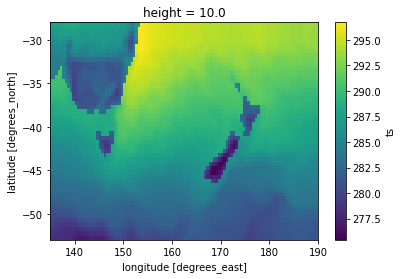

In [38]:
ensemble_mean.mean(dim='time').plot()

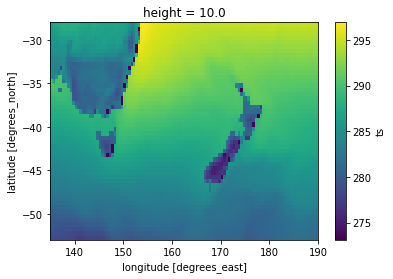

In [17]:
ts_control.mean(dim='time').plot()

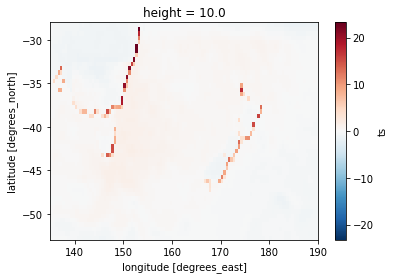

In [18]:
(mean_ts_1991 - ts_control.mean(dim='time')).plot()

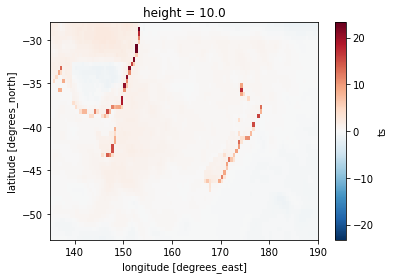

In [22]:
(mean_ts_2018 - ts_control.mean(dim='time')).plot()

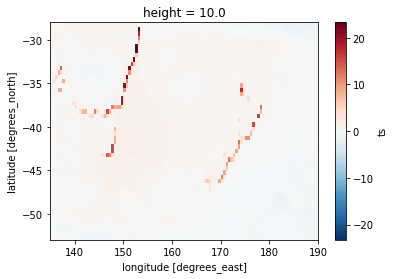

In [56]:
diff_map = (ensemble_mean.mean(dim='time') - ts_control.mean(dim='time'))
diff_map.plot()

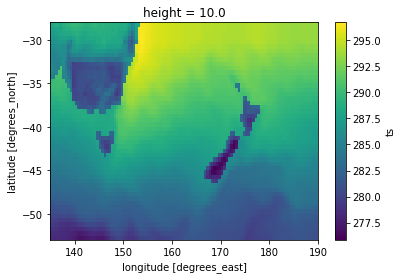

In [104]:
mean_ts_2018.plot()

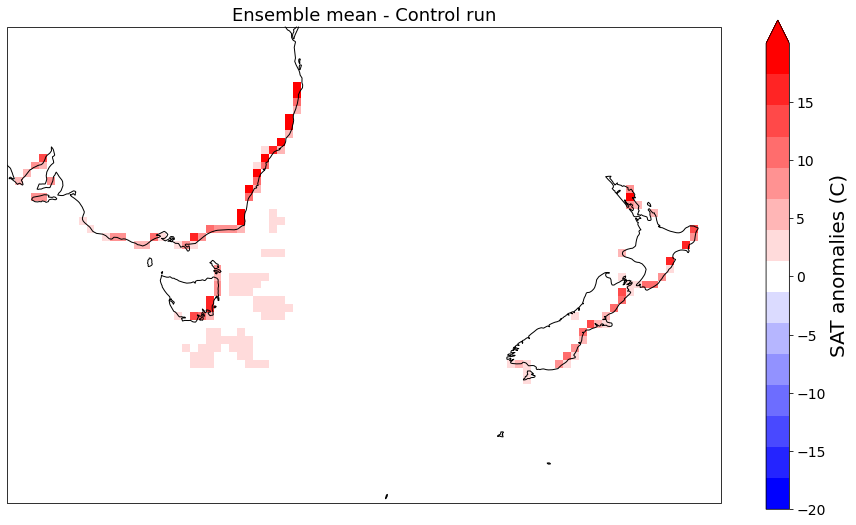

In [103]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([135, 180, -55, -25],crs=ccrs.PlateCarree())    

#ax.set_xticks([90, 105, 120, 135, 150, 165, 180], crs=ccrs.PlateCarree())
#ax.set_yticks([-60, -50, -40, -30, -20, -10, 0], crs=ccrs.PlateCarree())

ploteo=.plot(
            cmap=plt.cm.get_cmap('bwr', 15), 
            vmin=-20, vmax=20, # Minimum and maximum values of the colormap
       )

    
#ploteo=ts_control.mean(dim='time').plot.contourf(
                #levels=np.arange(270, 280, 1),
                #cmap=plt.cm.get_cmap('bwr', 15)
           #)

ploteo.colorbar.set_ticks(np.arange(-20,20,5))
ploteo.colorbar.ax.set_ylabel('SAT anomalies (C)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Ensemble mean - Control run', fontsize=18)

plt.show()
#plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_map_first.png')

In [54]:
# run the Welch's T-Test
r = stats.ttest_ind(ensemble_mean.mean(dim='time'), ts_control.mean(dim='time'), axis=0, equal_var=False, nan_policy='omit')
r

Ttest_indResult(statistic=array([ 0.39335746,  0.49867585,  0.4553277 ,  0.8017909 ,  0.9953951 ,
        0.47752848,  0.19834574,  0.17305396,  0.15260924,  0.26405108,
        0.31267735,  0.227213  ,  0.36778516,  0.49228975,  0.50835794,
        0.31281736,  0.51943946,  0.53617626,  0.8076281 ,  0.58329695,
        0.48027238,  0.7763249 ,  0.8026602 ,  1.4945334 ,  1.244423  ,
        2.021528  ,  2.0052435 ,  1.1358242 ,  1.1673179 ,  2.0207222 ,
        1.7000036 ,  1.7507364 ,  1.4459554 ,  1.0531819 ,  1.2799455 ,
        1.7034298 ,  1.7358618 ,  0.60584813,  0.559871  ,  0.5439334 ,
        0.50960034,  0.48205936,  0.4501282 ,  0.43632218,  0.44332892,
        0.43727183,  0.4051598 ,  0.3750487 ,  0.3548879 ,  0.3295801 ,
        0.2927367 ,  0.26478484,  0.27132708,  0.28090858,  0.2531527 ,
        0.22503044,  0.23258995,  0.26113507,  0.2879866 ,  0.30513263,
        0.311149  ,  0.30753133,  0.3053149 ,  0.36233127,  0.38604048,
        0.408797  ,  0.2256351 ,  0.22

In [55]:
# Convert the p-values into a dataarray:
da = xr.DataArray(r[1], dims=('latitude', 'longitude'), coords={
    'latitude': mean_ts_2018['latitude'],
    'longitude': mean_ts_2018['longitude']
})

ValueError: different number of dimensions on data and dims: 1 vs 2

Text(0.5, 1.0, 'Ensemble mean - Control run')

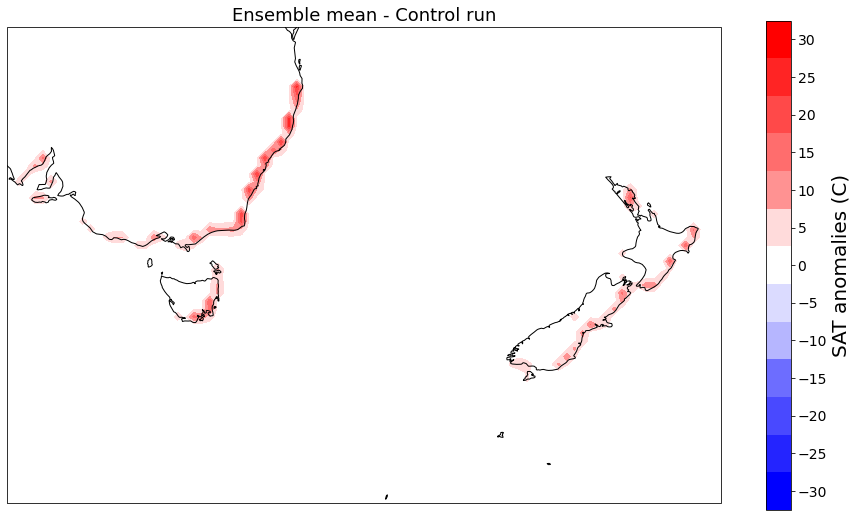

In [84]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([135, 180, -55, -25],crs=ccrs.PlateCarree())    

#ax.set_xticks([90, 105, 120, 135, 150, 165, 180], crs=ccrs.PlateCarree())
#ax.set_yticks([-60, -50, -40, -30, -20, -10, 0], crs=ccrs.PlateCarree())

#ploteo=diff_map.plot(
            #cmap=plt.cm.get_cmap('bwr', 15), 
            #vmin=-30, vmax=30, # Minimum and maximum values of the colormap
       #)

ploteo=(mean_ts_2018 - ts_control.mean(dim='time')).plot.contourf(
                levels=np.arange(-32.5, 35, 5),
                cmap=plt.cm.get_cmap('bwr', 15)
)
           

ploteo.colorbar.set_ticks(np.arange(-30,40,5))
ploteo.colorbar.ax.set_ylabel('SAT anomalies (C)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Ensemble mean - Control run', fontsize=18)

plt.show()

In [106]:
ds = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-run-new/result-uby108-1999/um_pvera_2014-*.nc')
ds2 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-run-new/result-uby108-1999/um_pvera_2015-*.nc')

In [108]:
ts1 = ds.ts.sel(time=slice('2014-06', '2014-12'))
ts2 = ds2.ts.sel(time=slice('2015-01', '2015-06'))

In [200]:
control_mean = xr.concat([ts1, ts2], dim='time').mean(dim='time')

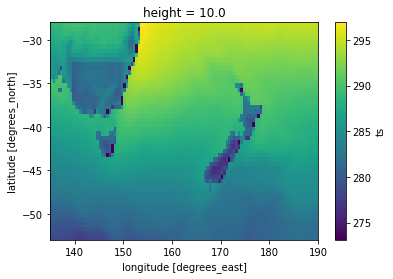

In [110]:
control_mean.plot()

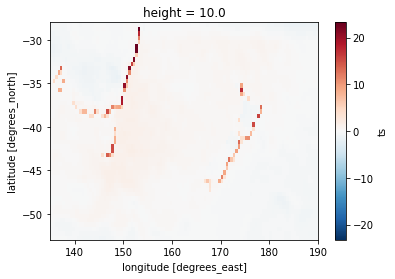

In [111]:
(mean_ts_2018 - control_mean).plot()

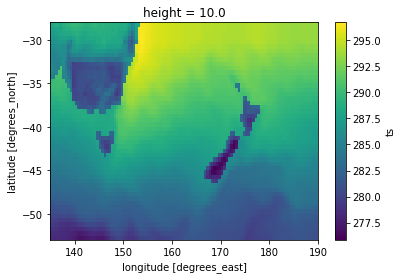

In [114]:
mean_ts_2018.plot()

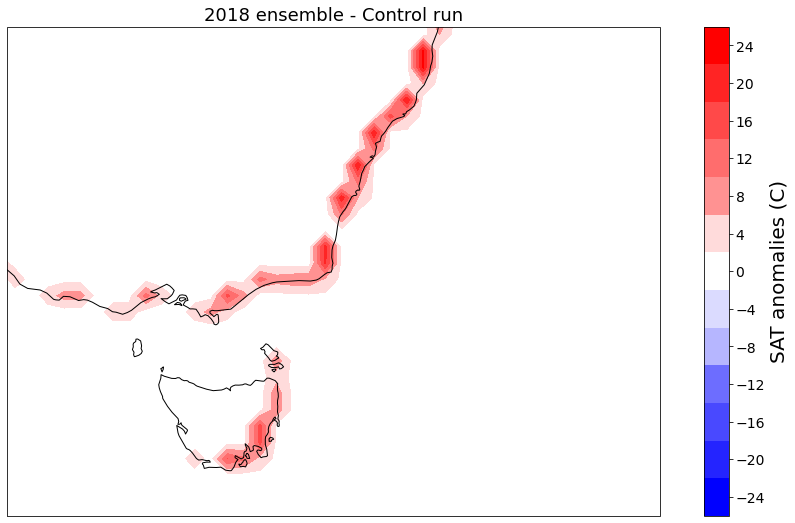

In [130]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 160, -45, -30],crs=ccrs.PlateCarree())    

#ploteo=mean_ts_2018.plot.contourf(
                #levels=np.arange(275, 300, 5),
                #cmap=plt.cm.get_cmap('viridis')
#)
           

ploteo=(mean_ts_2018 - control_mean).plot.contourf(
                levels=np.arange(-26, 28, 4),
                cmap=plt.cm.get_cmap('bwr', 15)
)

           

ploteo.colorbar.set_ticks(np.arange(-24,32,4))

#ploteo.colorbar.set_ticks(np.arange(275,300,5))
ploteo.colorbar.ax.set_ylabel('SAT anomalies (C)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('2018 ensemble - Control run', fontsize=18)

plt.show()

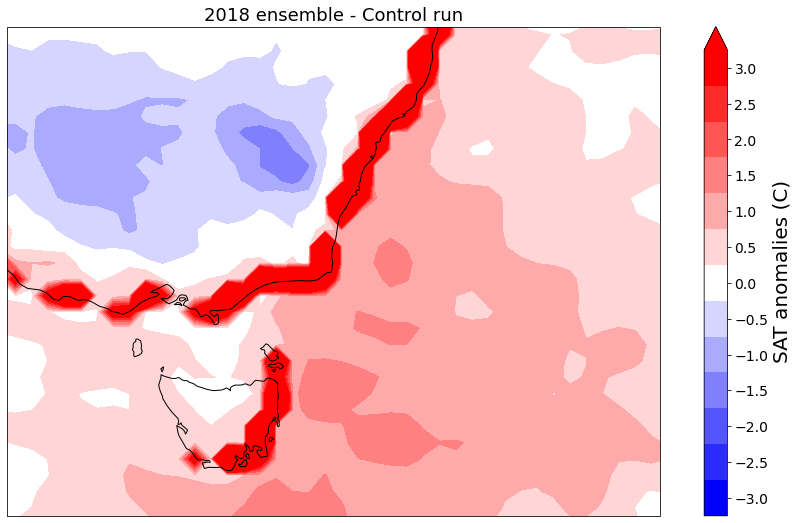

In [211]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 160, -45, -30],crs=ccrs.PlateCarree())    

#ploteo=mean_ts_2018.plot.contourf(
                #levels=np.arange(275, 300, 5),
                #cmap=plt.cm.get_cmap('viridis')
#)
           

ploteo=(mean_ts_2018 - control_mean).plot.contourf(
                levels=np.arange(-3.25, 3.5, 0.5),
                cmap=plt.cm.get_cmap('bwr', 13)
)

           

ploteo.colorbar.set_ticks(np.arange(-3,4,0.5))

#ploteo.colorbar.set_ticks(np.arange(275,300,5))
ploteo.colorbar.ax.set_ylabel('SAT anomalies (C)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('2018 ensemble - Control run', fontsize=18)

plt.show()

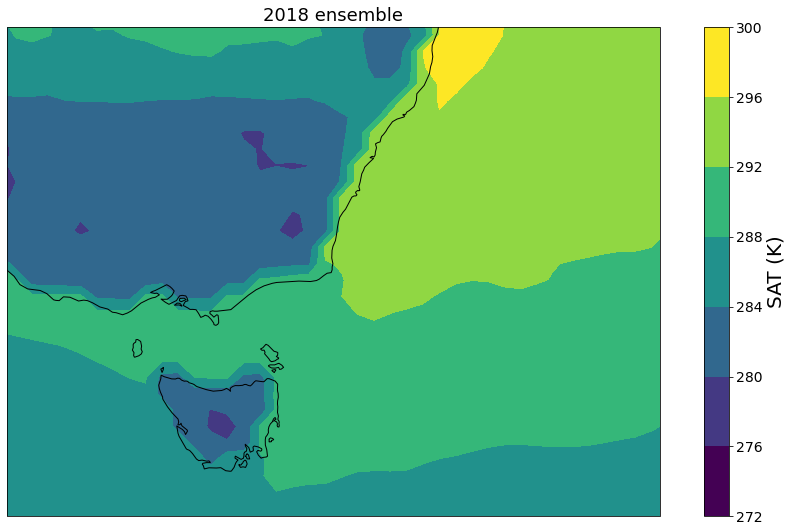

In [153]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 160, -45, -30],crs=ccrs.PlateCarree())    

ploteo=mean_ts_2018.plot.contourf(
                #levels=np.arange(275, 300, 5),
                cmap=plt.cm.get_cmap('viridis')
)
           




#ploteo.colorbar.set_ticks(np.arange(275,300,5))
ploteo.colorbar.ax.set_ylabel('SAT (K)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('2018 ensemble', fontsize=18)

plt.show()

In [135]:
sst_clim_input = xr.open_dataset('/g/data/e14/cp3790/Charuni/MHW-sev/tasman-clim-extrap.nc')

In [143]:
ssta_input = xr.open_dataset('/g/data/e14/cp3790/Charuni/MHW-sev/tasman-sst-extrap-new.nc')

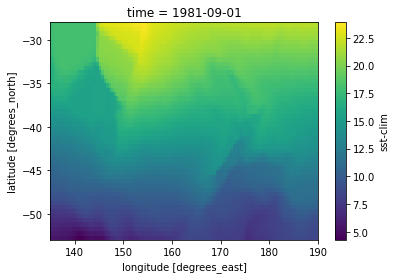

In [140]:
sst_clim_input['sst-clim'].mean(dim='month').plot()

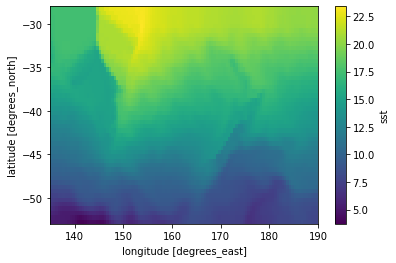

In [151]:
ssta_input['sst'].mean(dim='time').plot()

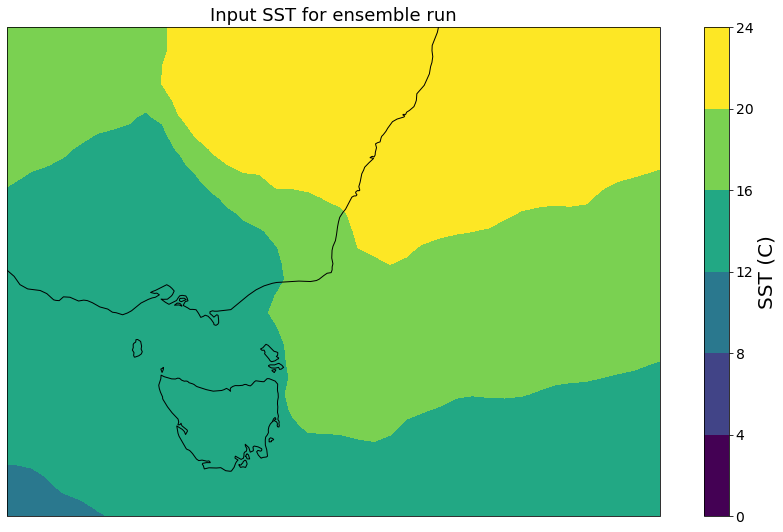

In [156]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 160, -45, -30],crs=ccrs.PlateCarree())    

ploteo=ssta_input['sst'].mean(dim='time').plot.contourf(
                #levels=np.arange(275, 300, 5),
                cmap=plt.cm.get_cmap('viridis')
)
           


#ploteo.colorbar.set_ticks(np.arange(275,300,5))
ploteo.colorbar.ax.set_ylabel('SST (C)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Input SST for ensemble run', fontsize=18)

plt.show()

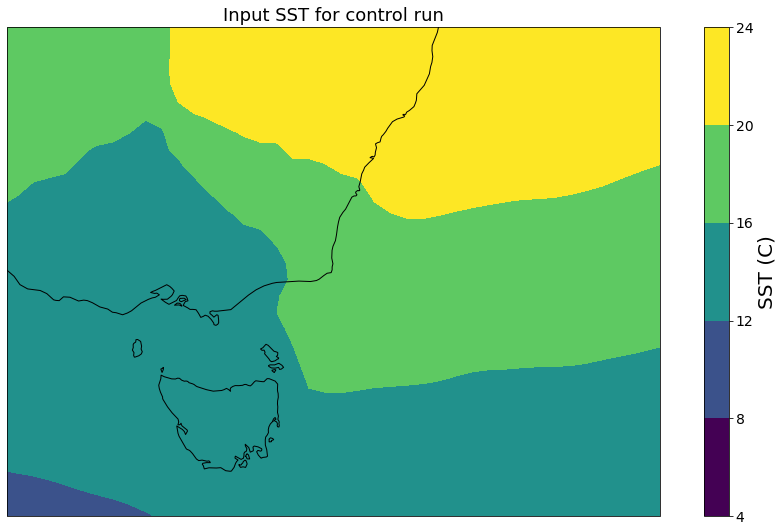

In [155]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 160, -45, -30],crs=ccrs.PlateCarree())    

ploteo=sst_clim_input['sst-clim'].mean(dim='month').plot.contourf(
                #levels=np.arange(275, 300, 5),
                cmap=plt.cm.get_cmap('viridis')
)
           




#ploteo.colorbar.set_ticks(np.arange(275,300,5))
ploteo.colorbar.ax.set_ylabel('SST (C)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Input SST for control run', fontsize=18)

plt.show()

In [157]:
ds_control = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-run-new/result-uby108-1980/um_pvera_*.nc')

In [158]:
ds_control_2 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-run-new/result-uby108-1999/um_pvera_*.nc')

In [160]:
mean_ts = ds_control.ts.mean(dim='time')

In [164]:
mean_ts_2 = ds_control_2.ts.sel(time=slice('2000-06', '2019-12'))

In [165]:
mean_ts_2 = mean_ts_2.mean(dim='time')

In [166]:
control_mean = xr.concat([mean_ts, mean_ts_2], dim='time')

In [175]:
control_mean

<xarray.DataArray 'ts' (time: 2, latitude: 50, longitude: 110)>
dask.array<concatenate, shape=(2, 50, 110), dtype=float32, chunksize=(1, 50, 110), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 135.2 135.8 136.2 136.8 ... 188.8 189.2 189.8
  * latitude   (latitude) float32 -52.75 -52.25 -51.75 ... -29.25 -28.75 -28.25
    height     float64 10.0
Dimensions without coordinates: time

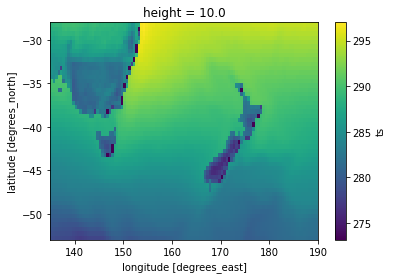

In [176]:
control_mean.mean(dim='time').plot()

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
test = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/test/result/um_pvera_*.nc')

In [4]:
test

<xarray.Dataset>
Dimensions:                          (time: 852, bnds: 2, longitude: 110, latitude: 50, longitude_0: 110, latitude_0: 51)
Coordinates:
  * time                             (time) datetime64[ns] 1981-06-01T12:00:0...
  * longitude                        (longitude) float32 135.2 135.8 ... 189.8
  * latitude                         (latitude) float32 -52.75 -52.25 ... -28.25
  * longitude_0                      (longitude_0) float32 135.0 135.5 ... 189.5
  * latitude_0                       (latitude_0) float32 -53.0 -52.5 ... -28.0
    height                           float64 10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    latitude_longitude               (time) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    rss_corr                         (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    rls                              (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts                               (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts_0                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts_1                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    surface_upward_latent_heat_flux  (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    hfss                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    uas                              (time, latitude_0, longitude_0) float32 dask.array<chunksize=(30, 51, 110), meta=np.ndarray>
    vas                              (time, latitude_0, longitude_0) float32 dask.array<chunksize=(30, 51, 110), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    source:       Data from Met Office Unified Model
    history:      Fri Oct 29 10:13:50 2021: cdo mergetime /g/data/e14/cp3790/...
    um_version:   11.7
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

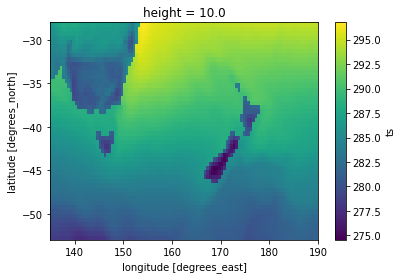

In [5]:
test.ts.mean(dim='time').plot()

In [10]:
alt_run_1981 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/test/result-1981/um_pvera_*.nc')

In [16]:
alt_run_1982 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/test/result-1982/um_pvera_*.nc')

In [22]:
mean_ts_1981_new = alt_run_1981.ts.mean(dim='time')

In [17]:
mean_ts_1982 = alt_run_1982.ts.mean(dim='time')

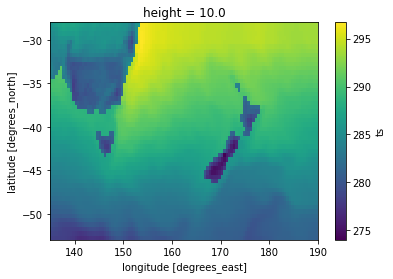

In [14]:
mean_ts_1981.plot()

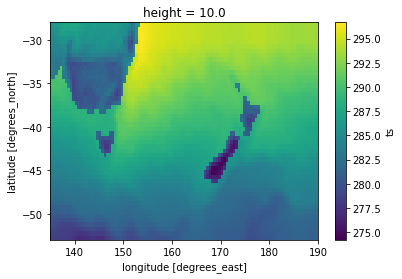

In [18]:
mean_ts_1982.plot()

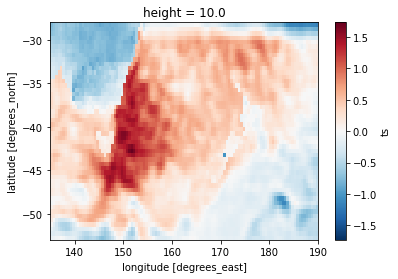

In [15]:
(mean_ts_1981 - test.ts.mean(dim='time')).plot()

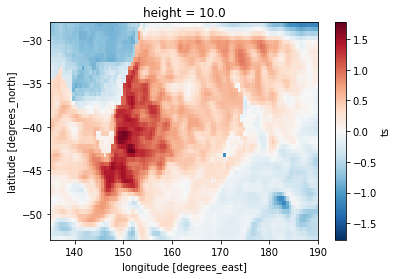

In [9]:
(mean_ts_1981 - test.ts.mean(dim='time')).plot()

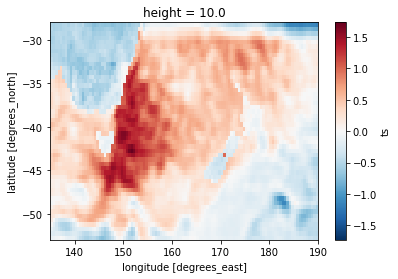

In [19]:
(mean_ts_1982 - test.ts.mean(dim='time')).plot()

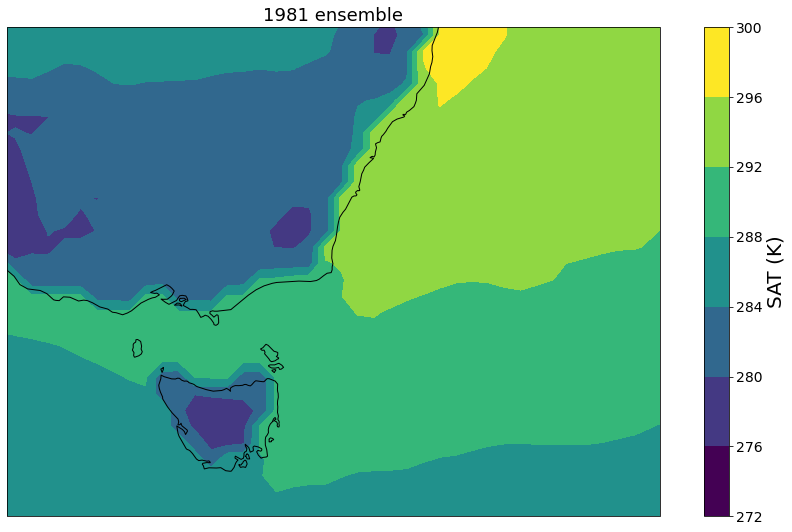

In [45]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 160, -45, -30],crs=ccrs.PlateCarree())    

ploteo=mean_ts_1981.plot.contourf(
                #levels=np.arange(275, 300, 5),
                cmap=plt.cm.get_cmap('viridis')
)
           
ploteo.colorbar.ax.set_ylabel('SAT (K)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('1981 ensemble', fontsize=18)

plt.savefig('1981-ensemble.png')

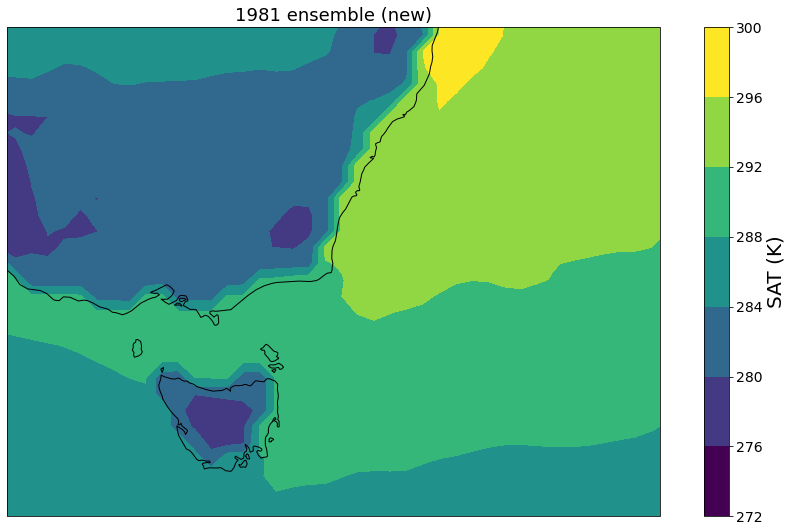

In [46]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 160, -45, -30],crs=ccrs.PlateCarree())    

ploteo=mean_ts_1981_new.plot.contourf(
                #levels=np.arange(275, 300, 5),
                cmap=plt.cm.get_cmap('viridis')
)
           
ploteo.colorbar.ax.set_ylabel('SAT (K)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('1981 ensemble (new)', fontsize=18)

plt.savefig('1981-ensemble-new.png')

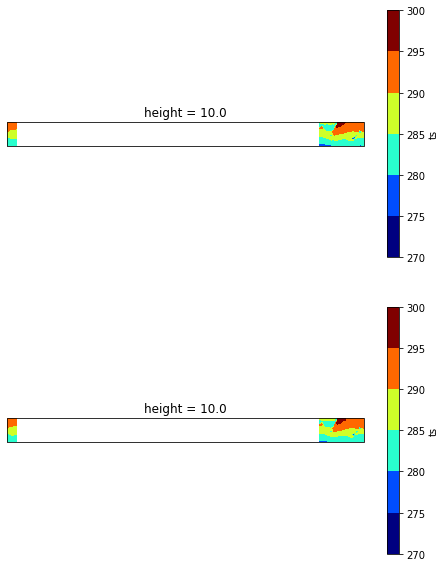

In [38]:
plt.figure(figsize=(8, 10))
ax1 = plt.subplot(2,1,1, projection=ccrs.PlateCarree())
mean_ts_1981_new.plot.contourf(ax=ax1, transform=ccrs.PlateCarree(),cmap="jet", vmin=270, vmax=300)

ax2 = plt.subplot(2,1,2, projection=ccrs.PlateCarree())
mean_ts_1981.plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),cmap="jet", vmin=270, vmax=300)
plt.show()

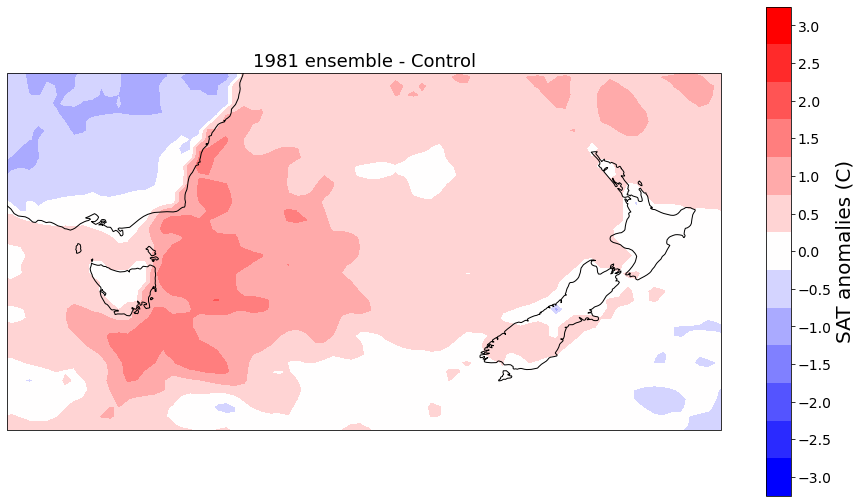

In [83]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 180, -50, -30],crs=ccrs.PlateCarree())    

#ploteo=mean_ts_2018.plot.contourf(
                #levels=np.arange(275, 300, 5),
                #cmap=plt.cm.get_cmap('viridis')
#)



ploteo=(mean_ts_1981 - test.ts.mean(dim='time')).plot.contourf(
                levels=np.arange(-3.25, 3.5, 0.5),
                cmap=plt.cm.get_cmap('bwr')
)

           

ploteo.colorbar.set_ticks(np.arange(-3,4,0.5))

#ploteo.colorbar.set_ticks(np.arange(275,300,5))
ploteo.colorbar.ax.set_ylabel('SAT anomalies (C)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('1981 ensemble - Control', fontsize=18)

plt.savefig('1981-ensemble-control-diff.png')

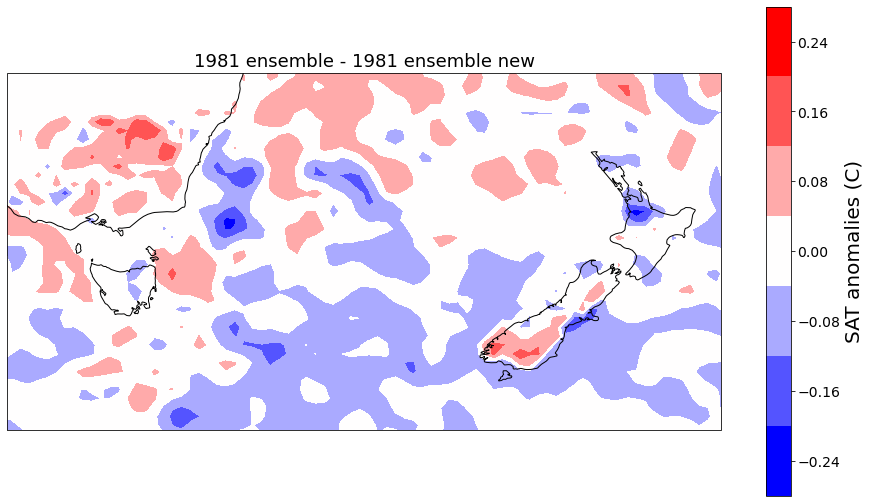

In [62]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 180, -50, -30],crs=ccrs.PlateCarree())    

#ploteo=mean_ts_2018.plot.contourf(
                #levels=np.arange(275, 300, 5),
                #cmap=plt.cm.get_cmap('viridis')
#)
           

ploteo=(mean_ts_1981 - mean_ts_1981_new).plot.contourf(
                levels=np.arange(-0.28, 0.32, 0.08),
                cmap=plt.cm.get_cmap('bwr')
)

           

ploteo.colorbar.set_ticks(np.arange(-2.4,0.4,0.08))

ploteo.colorbar.ax.set_ylabel('SAT anomalies (C)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('1981 ensemble - 1981 ensemble new', fontsize=18)

plt.savefig('1981-ensemble-diff.png')

In [ ]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 180, -50, -30],crs=ccrs.PlateCarree())    

#ploteo=mean_ts_2018.plot.contourf(
                #levels=np.arange(275, 300, 5),
                #cmap=plt.cm.get_cmap('viridis')
#)
           

ploteo=(mean_ts_1981 - mean_ts_1981_new).plot.contourf(
                levels=np.arange(-0.28, 0.32, 0.08),
                cmap=plt.cm.get_cmap('bwr')
)

           

ploteo.colorbar.set_ticks(np.arange(-2.4,0.4,0.08))

ploteo.colorbar.ax.set_ylabel('SAT anomalies (C)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('1981 ensemble - 1981 ensemble new', fontsize=18)

plt.savefig('1981-ensemble-diff.png')

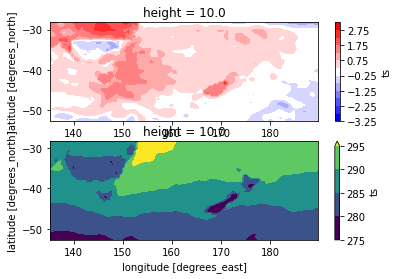

In [66]:
ax=plt.subplot(211)
ploteo=(mean_ts_2018 - test.ts.mean(dim='time')).plot.contourf(
                levels=np.arange(-3.25, 3.5, 0.5),
                cmap=plt.cm.get_cmap('bwr', 13)
)
ax=plt.subplot(212)
ploteo2=mean_ts_2018.plot.contourf(
                levels=np.arange(275, 300, 5),
                cmap=plt.cm.get_cmap('viridis')
)


In [78]:
test_2000 = xr.open_dataset('/g/data/e14/cp3790/Charuni/umnsaa_pvera20000911.nc')

In [79]:
test_2000

<xarray.Dataset>
Dimensions:                          (time: 1, latitude: 50, longitude: 110, bnds: 2, latitude_0: 51, longitude_0: 110)
Coordinates:
  * time                             (time) datetime64[ns] 2000-09-11T12:00:00
  * latitude                         (latitude) float32 -52.75 -52.25 ... -28.25
  * longitude                        (longitude) float32 135.2 135.8 ... 189.8
    forecast_period                  timedelta64[ns] ...
    forecast_reference_time          datetime64[ns] ...
  * latitude_0                       (latitude_0) float32 -53.0 -52.5 ... -28.0
  * longitude_0                      (longitude_0) float32 135.0 135.5 ... 189.5
    height                           float64 ...
Dimensions without coordinates: bnds
Data variables:
    rss_corr                         (time, latitude, longitude) float32 ...
    latitude_longitude               int32 ...
    time_bnds                        (time, bnds) datetime64[ns] ...
    forecast_period_bnds             (bnds) float64 ...
    rls                              (time, latitude, longitude) float32 ...
    ts                               (time, latitude, longitude) float32 ...
    ts_0                             (time, latitude, longitude) float32 ...
    ts_1                             (time, latitude, longitude) float32 ...
    surface_upward_latent_heat_flux  (time, latitude, longitude) float32 ...
    hfss                             (time, latitude, longitude) float32 ...
    uas                              (time, latitude_0, longitude_0) float32 ...
    vas                              (time, latitude_0, longitude_0) float32 ...
Attributes:
    history:     2021-11-03T01:31:42.391268: /g/data3/hh5/public/apps/minicon...
    source:      Data from Met Office Unified Model
    um_version:  11.7

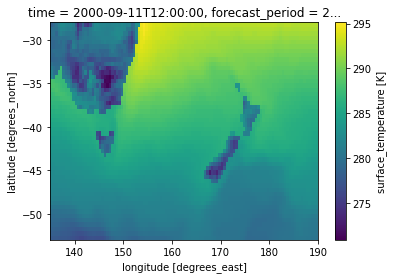

In [80]:
test_2000.ts.plot()

## New control runs

In [42]:
ds_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
ds_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
ds_2019 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-2019/um_pvera_*.nc')

In [43]:
combined = xr.concat([ds_1980, ds_1999, ds_2019], dim='time')
combined

<xarray.Dataset>
Dimensions:                          (time: 15068, bnds: 2, longitude: 110, latitude: 50, longitude_0: 110, latitude_0: 51)
Coordinates:
  * time                             (time) datetime64[ns] 1981-06-01T12:00:0...
  * longitude                        (longitude) float32 135.2 135.8 ... 189.8
  * latitude                         (latitude) float32 -52.75 -52.25 ... -28.25
  * longitude_0                      (longitude_0) float32 135.0 135.5 ... 189.5
  * latitude_0                       (latitude_0) float32 -53.0 -52.5 ... -28.0
    height                           float64 10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    latitude_longitude               (time) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    rss_corr                         (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    rls                              (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts                               (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts_0                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts_1                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    surface_upward_latent_heat_flux  (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    hfss                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    uas                              (time, latitude_0, longitude_0) float32 dask.array<chunksize=(30, 51, 110), meta=np.ndarray>
    vas                              (time, latitude_0, longitude_0) float32 dask.array<chunksize=(30, 51, 110), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    source:       Data from Met Office Unified Model
    history:      Fri Nov 19 11:25:57 2021: cdo mergetime /g/data/e14/cp3790/...
    um_version:   11.7
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

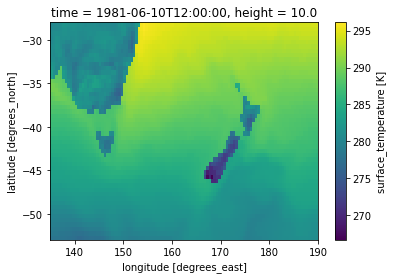

In [44]:
combined.ts.isel(time=9).plot()

In [45]:
control_mean = combined.ts.mean(dim='time')

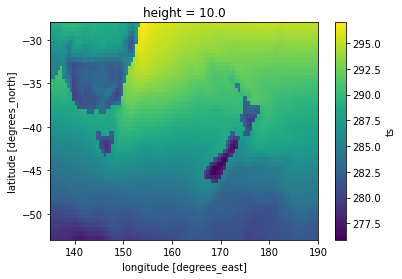

In [46]:
control_mean.plot()

In [10]:
alt_run_1981 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/test/result-1981/um_pvera_*.nc')

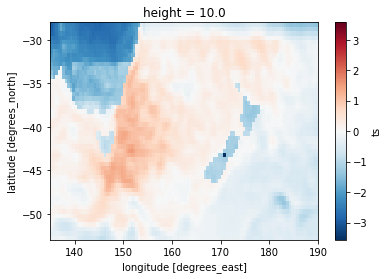

In [11]:
(alt_run_1981.ts.mean(dim='time') - control_mean).plot()

In [12]:
ds_alt = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_*.nc')

ValueError: Resulting object does not have monotonic global indexes along dimension time

In [14]:
alt_run_1981 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/result-1981/um_pvera_*.nc')
alt_run_1982 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/result-1982/um_pvera_*.nc')
alt_run_1983 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/result-1983/um_pvera_*.nc')
alt_run_1984 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/result-1984/um_pvera_*.nc')

In [15]:
alt_combined = xr.concat([alt_run_1981, alt_run_1982, alt_run_1983, alt_run_1984], dim='time')
alt_combined

<xarray.Dataset>
Dimensions:                          (time: 1829, bnds: 2, longitude: 110, latitude: 50, longitude_0: 110, latitude_0: 51)
Coordinates:
  * time                             (time) datetime64[ns] 1981-06-01T12:00:0...
  * longitude                        (longitude) float32 135.2 135.8 ... 189.8
  * latitude                         (latitude) float32 -52.75 -52.25 ... -28.25
  * longitude_0                      (longitude_0) float32 135.0 135.5 ... 189.5
  * latitude_0                       (latitude_0) float32 -53.0 -52.5 ... -28.0
    height                           float64 10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    latitude_longitude               (time) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    rss_corr                         (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    rls                              (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts                               (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts_0                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    ts_1                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    surface_upward_latent_heat_flux  (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    hfss                             (time, latitude, longitude) float32 dask.array<chunksize=(30, 50, 110), meta=np.ndarray>
    uas                              (time, latitude_0, longitude_0) float32 dask.array<chunksize=(30, 51, 110), meta=np.ndarray>
    vas                              (time, latitude_0, longitude_0) float32 dask.array<chunksize=(30, 51, 110), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Sep 13 10:04:42 2021: cdo mergetime /g/data/e14/cp3790/...
    source:       Data from Met Office Unified Model
    um_version:   11.7
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [18]:
alt_mean = alt_combined.ts.mean(dim='time')

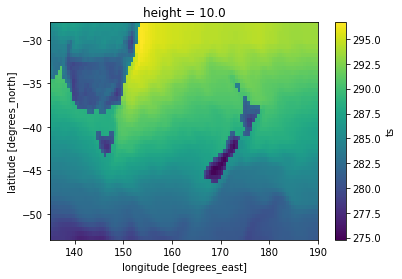

In [19]:
alt_mean.plot()

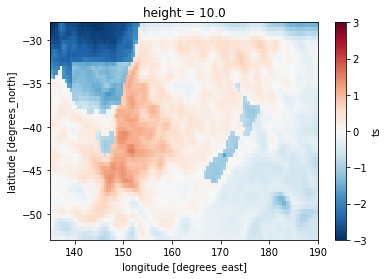

In [20]:
(alt_mean - control_mean).plot()

In [39]:
ensemble_mean_new = ensemble_mean.mean(dim='time')

In [47]:
diff = ensemble_mean_new - control_mean

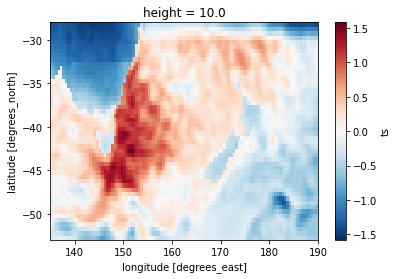

In [48]:
diff.plot()

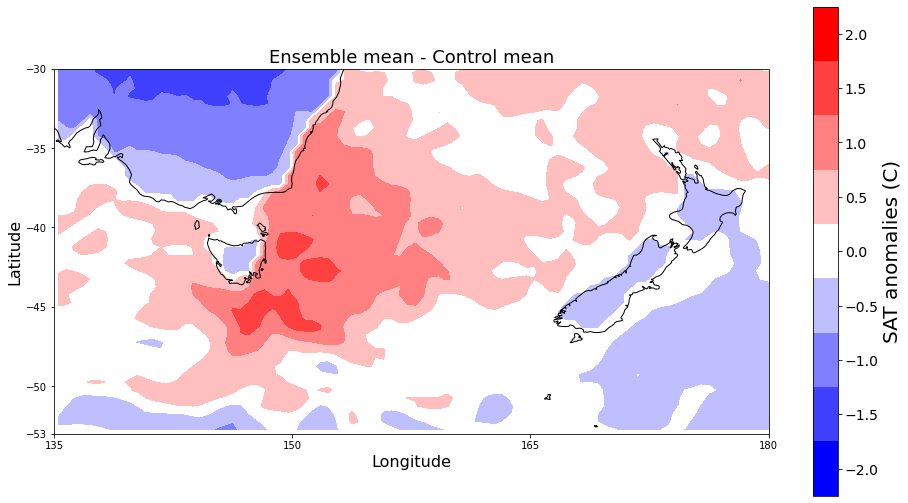

In [57]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree())    

ax.set_xticks([135, 150, 165, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-53, -50, -45, -40, -35, -30], crs=ccrs.PlateCarree())

ploteo=diff.plot.contourf(
            levels=np.arange(-2.25, 2.5, 0.5),
            cmap=plt.cm.get_cmap('bwr', 9), 
       )

ploteo.colorbar.set_ticks(np.arange(-3,4,0.5))
ploteo.colorbar.set_ticks(np.arange(-2,3,0.5))
ploteo.colorbar.ax.set_ylabel('SAT anomalies (C)',fontsize=20)
ploteo.colorbar.ax.tick_params(labelsize=14)
ax.coastlines()


plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Ensemble mean - Control mean', fontsize=18)

#plt.show()
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/diff_map_ensemble_control.png')